In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Load from Google Drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/startup_funding.csv')

# Show the first few rows
df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
# Show basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [9]:
# Show column names
df.columns


Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [10]:
# Rename 'City  Location' to 'City' for convenience
df.rename(columns={'City  Location': 'City'}, inplace=True)


In [13]:
df.drop('Sr No', axis=1, inplace=True)


In [14]:
# Fix Date column - some values might be NaN or badly formatted
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # invalid dates → NaT (Not a Time)


KeyError: 'Date'

In [15]:
df.columns.tolist()


['Date dd/mm/yyyy',
 'Startup Name',
 'Industry Vertical',
 'SubVertical',
 'City',
 'Investors Name',
 'InvestmentnType',
 'Amount in USD',
 'Remarks']

In [16]:
# Rename 'Date dd/mm/yyyy' to 'Date'
df.rename(columns={'Date dd/mm/yyyy': 'Date'}, inplace=True)


In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


In [18]:
df['Date'].head()


,Date
0,2020-01-09
1,2020-01-13
2,2020-01-09
3,2020-01-02
4,2020-01-02


In [19]:
# Remove commas, convert to float
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')  # errors → NaN


In [20]:
# Drop rows where Startup Name or Amount is missing
df = df.dropna(subset=['Startup Name', 'Amount in USD'])


In [21]:
# Convert all startup names and cities to title case
df['Startup Name'] = df['Startup Name'].str.title()
df['City'] = df['City'].str.title()
df['Industry Vertical'] = df['Industry Vertical'].str.title()


/tmp/ipython-input-21-4005987739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Startup Name'] = df['Startup Name'].str.title()
/tmp/ipython-input-21-4005987739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].str.title()
/tmp/ipython-input-21-4005987739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [22]:
df.loc[:, 'Startup Name'] = df['Startup Name'].str.title()
df.loc[:, 'City'] = df['City'].str.title()
df.loc[:, 'Industry Vertical'] = df['Industry Vertical'].str.title()


In [24]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2065 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2059 non-null   datetime64[ns]
 1   Startup Name       2065 non-null   object        
 2   Industry Vertical  1934 non-null   object        
 3   SubVertical        1418 non-null   object        
 4   City               1930 non-null   object        
 5   Investors Name     2045 non-null   object        
 6   InvestmentnType    2062 non-null   object        
 7   Amount in USD      2065 non-null   float64       
 8   Remarks            337 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 161.3+ KB


,Date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks
0,2020-01-09,Byju’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN
2,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN
3,2020-01-02,Https://Www.Wealthbucket.In/,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,2020-01-02,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


/tmp/ipython-input-25-56548538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/tmp/ipython-input-25-56548538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funding_by_year, x='Year', y='Amount in USD', palette='viridis')


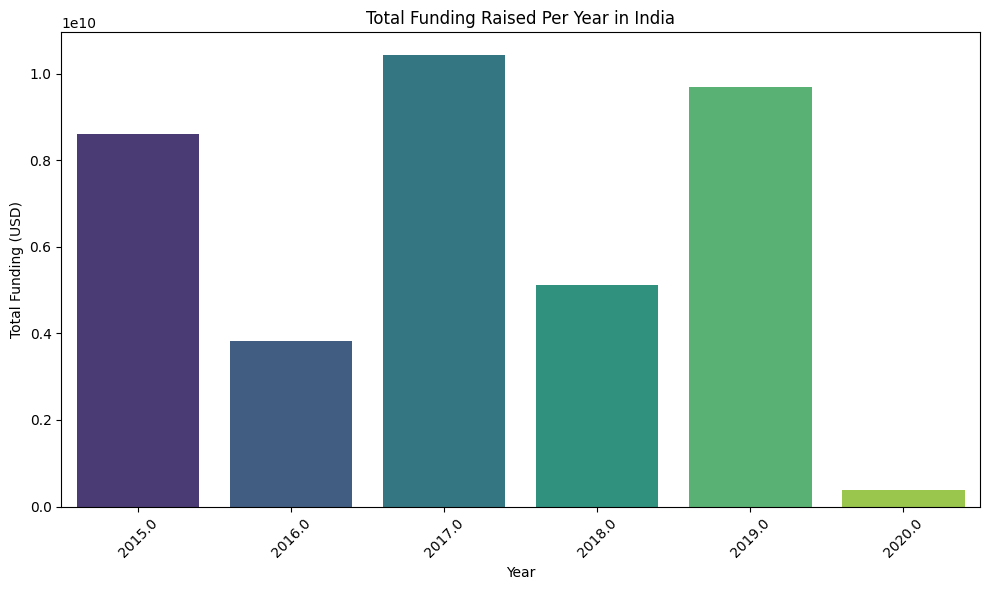

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by Year and sum funding amount
funding_by_year = df.groupby('Year')['Amount in USD'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=funding_by_year, x='Year', y='Amount in USD', palette='viridis')
plt.title('Total Funding Raised Per Year in India')
plt.ylabel('Total Funding (USD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
df.loc[:, 'Year'] = df['Date'].dt.year


/tmp/ipython-input-27-346287588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funding_by_year, x='Year', y='Amount in USD', palette='viridis', legend=False)


<Axes: xlabel='Year', ylabel='Amount in USD'>

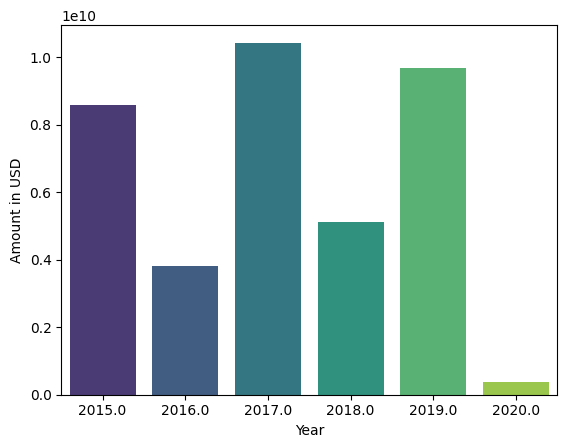

In [27]:
sns.barplot(data=funding_by_year, x='Year', y='Amount in USD', palette='viridis', legend=False)


/tmp/ipython-input-28-1530624345.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funding_by_year, x='Year', y='Amount in USD', palette='viridis', legend=False)


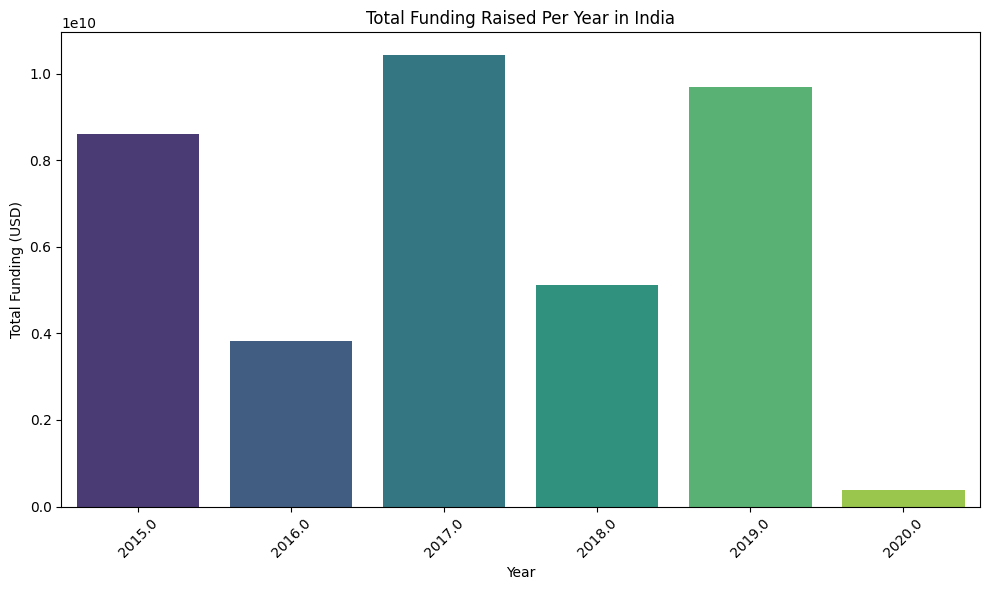

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make sure Year column exists safely
df = df.copy()
df['Year'] = df['Date'].dt.year

# Step 2: Group and sum
funding_by_year = df.groupby('Year')['Amount in USD'].sum().reset_index()

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.barplot(data=funding_by_year, x='Year', y='Amount in USD', palette='viridis', legend=False)
plt.title('Total Funding Raised Per Year in India')
plt.ylabel('Total Funding (USD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-29-1346475554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_startups, y='Startup Name', x='Amount in USD', palette='crest')


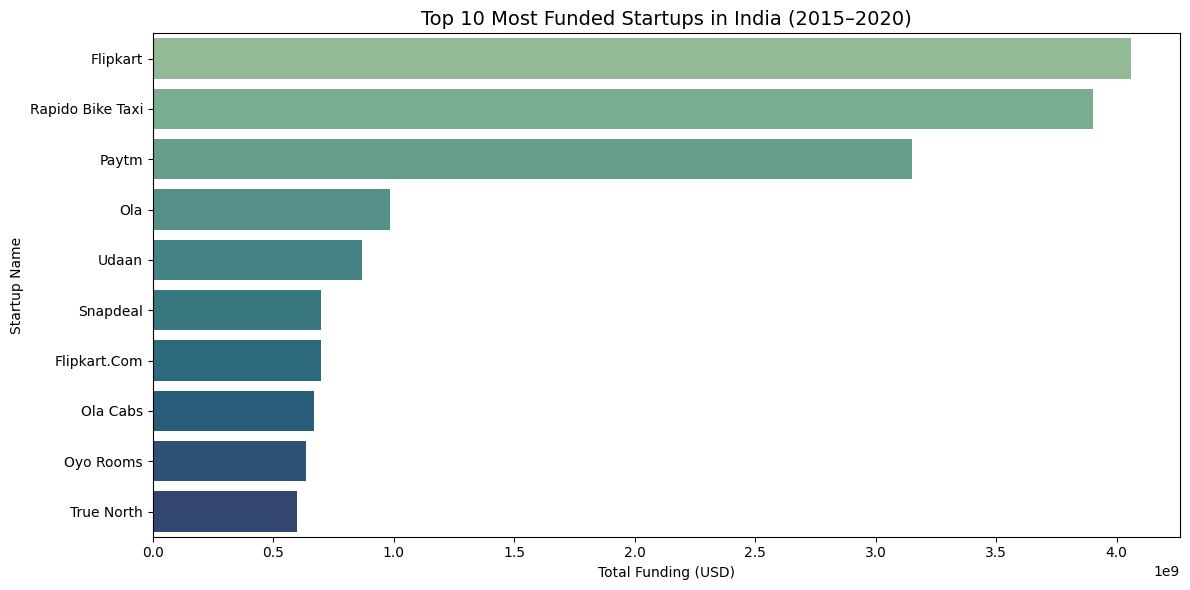

In [29]:
# Step 1: Group by startup name and sum the funding amount
top_startups = df.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_startups, y='Startup Name', x='Amount in USD', palette='crest')
plt.title('Top 10 Most Funded Startups in India (2015–2020)', fontsize=14)
plt.xlabel('Total Funding (USD)')
plt.ylabel('Startup Name')
plt.tight_layout()
plt.show()


/tmp/ipython-input-30-3539861076.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sectors, x='Amount in USD', y='Industry Vertical', palette='mako')


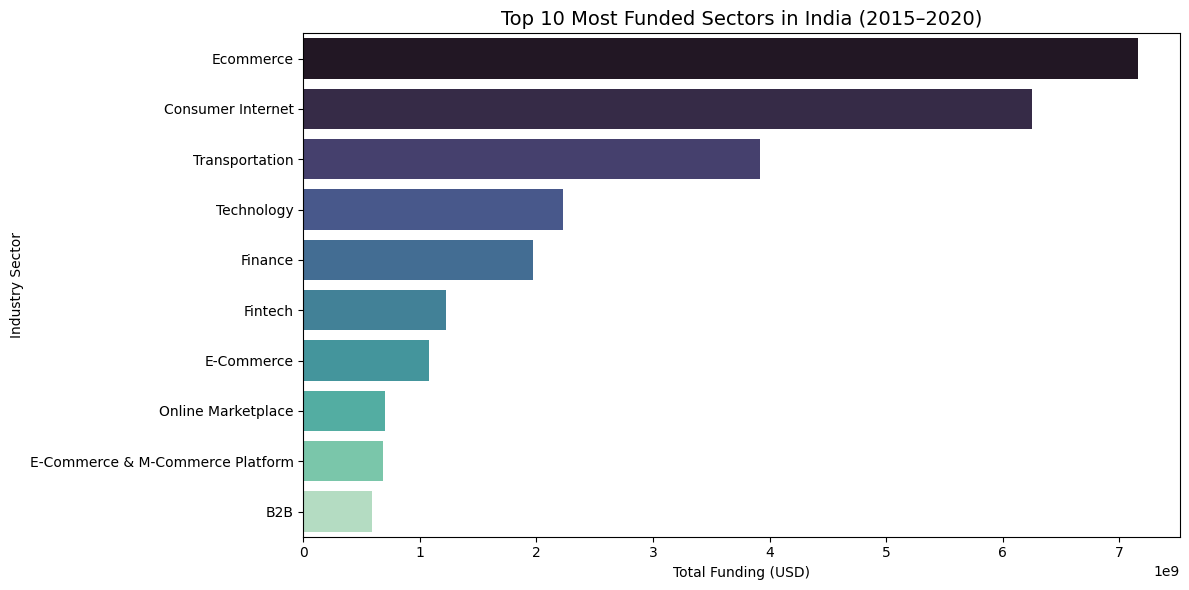

In [30]:
# Step 1: Group by Industry Vertical and sum the funding amount
top_sectors = df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_sectors, x='Amount in USD', y='Industry Vertical', palette='mako')
plt.title('Top 10 Most Funded Sectors in India (2015–2020)', fontsize=14)
plt.xlabel('Total Funding (USD)')
plt.ylabel('Industry Sector')
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-559881768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Amount in USD', y='City', palette='rocket')


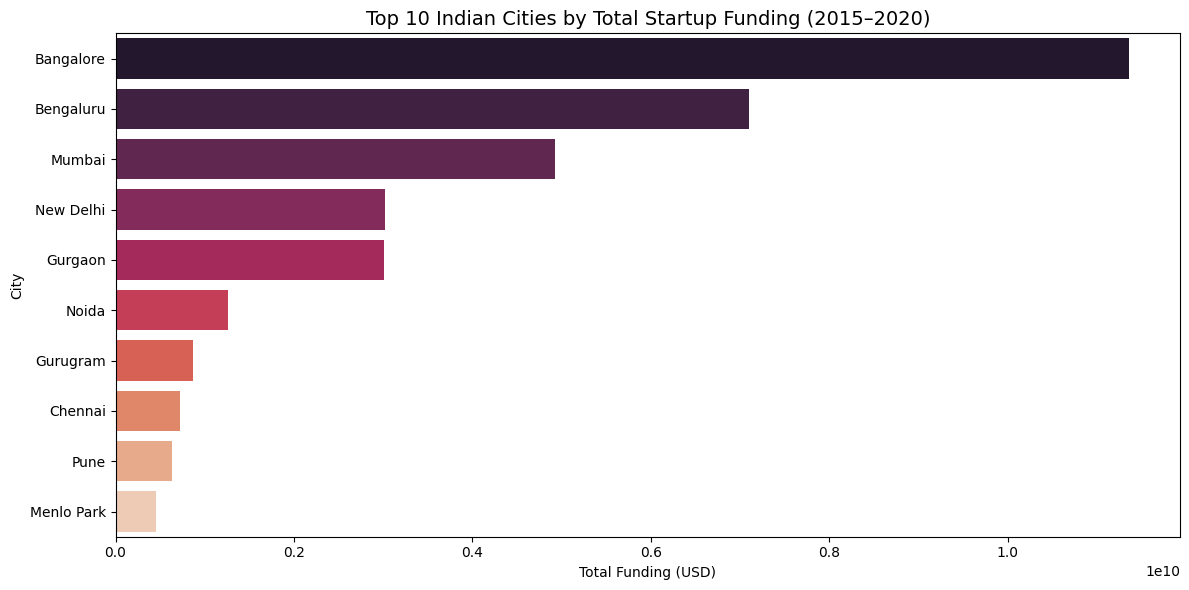

In [31]:
# Step 1: Group by City and sum funding amount
top_cities = df.groupby('City')['Amount in USD'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x='Amount in USD', y='City', palette='rocket')
plt.title('Top 10 Indian Cities by Total Startup Funding (2015–2020)', fontsize=14)
plt.xlabel('Total Funding (USD)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [32]:
# Standardize city names (optional)
df['City'] = df['City'].replace({'Bangalore': 'Bengaluru', 'New Delhi': 'Delhi'})


/tmp/ipython-input-33-559881768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Amount in USD', y='City', palette='rocket')


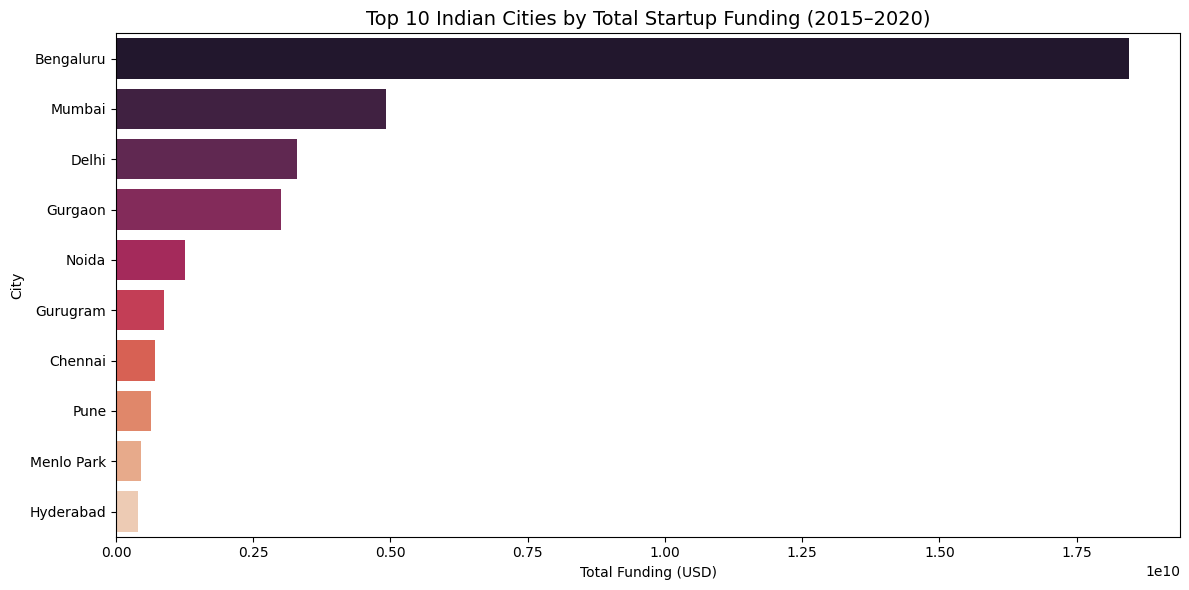

In [33]:
# Step 1: Group by City and sum funding amount
top_cities = df.groupby('City')['Amount in USD'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x='Amount in USD', y='City', palette='rocket')
plt.title('Top 10 Indian Cities by Total Startup Funding (2015–2020)', fontsize=14)
plt.xlabel('Total Funding (USD)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [34]:
# Step 1: Check the unique funding types
df['Investment Type'] = df['SubVertical']  # Only if there's no 'Investment Type' column; adjust as needed
df['Investment Type'].value_counts().head(10)


,count
Investment Type,
Online Lending Platform,11
Online Pharmacy,5
Education,5
Online Lending,5
Online Food Delivery,4
Non-Banking Financial Company,4
Online lending platform,4
Online Education Platform,4
Food Delivery Platform,4


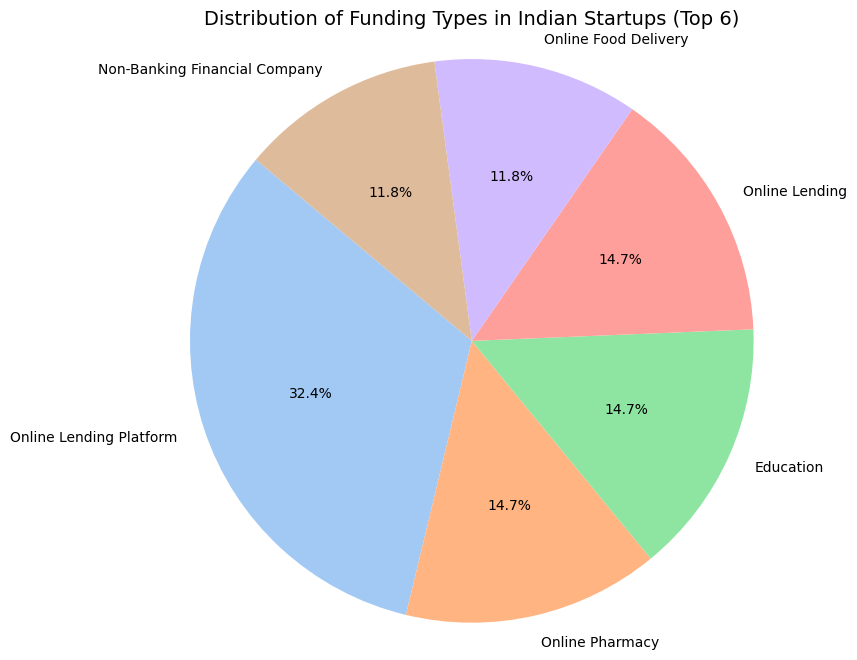

In [35]:
# Step 2: Count each type
funding_type_counts = df['Investment Type'].value_counts().head(6)

# Step 3: Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(funding_type_counts, labels=funding_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Funding Types in Indian Startups (Top 6)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio makes pie circular
plt.show()
